## Numerical analysis for the error equatinon of the first system

---

$$
f(\alpha)= \frac{(1+\alpha^{2}x_{0}^{2})^{\frac{N+1}{2}}}{\alpha^{N}}
$$

In [8]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from math import *

We first take the logarithm of the error equation, we have:
$$
\log f(\alpha)= \frac{N+1}{2}\log(1+\alpha^{2}x_{0}^{2})-N\log(\alpha)
$$
We take the derivative of the logarithm of the error equation, we have:
$$
\begin{aligned}
\frac{d\log f(\alpha)}{d\alpha}&= \frac{N+1}{2}\frac{2\alpha x_{0}^{2}}{1+\alpha^{2}x_{0}^{2}}-\frac{N}{\alpha}\\
&= \frac{(N+1)x_{0}^{2} \alpha}{1+\alpha^{2}x_{0}^{2}} - \frac{N}{\alpha}\\
\end{aligned}
$$
Since $\log$ is increasing function, therefore, in order to find the local minimum of the error equation, we need to find the point where the derivative of the logarithm of the error equation is zero, i.e.
$$
\frac{d\log f(\alpha)}{d\alpha} = \frac{(N+1)x_{0}^{2} \alpha}{1+\alpha^{2}x_{0}^{2}} - \frac{N}{\alpha} = 0
$$
Then we have:
$$
\begin{aligned}
(N+1)x_{0}^{2} \alpha^2 &= N + N \alpha^2 x_{0}^{2}\\
x_{0}^{2} \alpha^2 &= N \\
\alpha &= \sqrt{\frac{N}{x_{0}^{2}}} = \frac{\sqrt{N}}{x_0}\\
\end{aligned}
$$

In [9]:
x = sym.Symbol('x')

def f(x, x0=0.1, N=2):
    exp_num = (N + 1) / 2
    return (1 + x ** 2 * x0 ** 2) ** exp_num * (1 / x ** N)


0.1


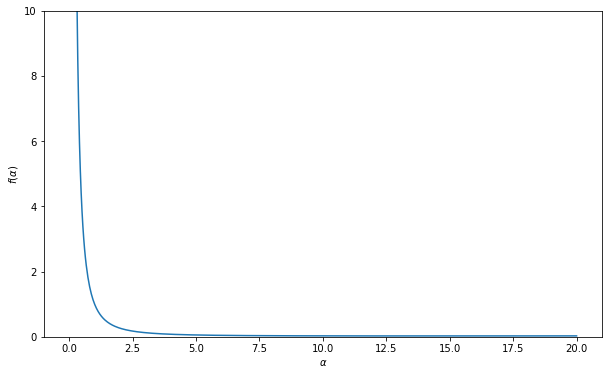

0.4


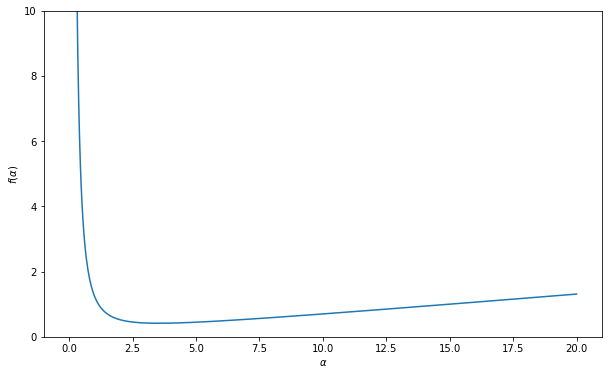

0.7


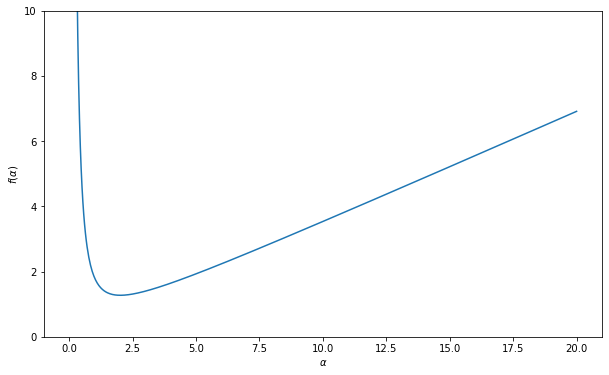

In [10]:
x = np.linspace(0.01,20, 600)
for i in range(1, 10, 3):
  i = i/10
  print(i)
  y = f(x, x0=i)
  plt.figure(figsize=(10, 6))
  plt.plot(x, y)
  plt.ylim([0, 10])
  plt.xlabel(r'$\alpha$')
  plt.ylabel(r'$f(\alpha)$')
  plt.show()

---

### Analysis Part for the equation

Here we find the Analytic expression for the local minimum of the error equation, we have:
$$
\alpha = \sqrt{\frac{N}{x_{0}^{2}}}
$$
Then, we need to compare the analytic expression with the boundary condition of $\alpha>\frac{2 a x_0}{\sqrt{1-4 a^2 x_{0}^4}}$ and $a x_0^2<\frac{1}{2}$. We have:
$$
\begin{aligned}
\alpha = \sqrt{\frac{N}{x_{0}^{2}}} &> \frac{2 a x_0}{\sqrt{1-4 a^2 x^4}}\\
\frac{N}{x_{0}^{2}} &> \frac{4 a^2 x_{0}^4}{1 - 4a^{2}x_{0}^{4}}\\
N - 4Na^2 x_{0}^4 &> 4 a^2 x_{0}^4\\
N &> (4N+4) a^2 x_{0}^4\\
\end{aligned}
$$
Therefore, we have the condition that:
$$
ax_{0}^{2} < \frac{1}{2} \sqrt{\frac{N}{N+1}} < \frac{1}{2}
$$
So we can see that for all the cases, the local minimum exists since the condition is always satisfied.

In [11]:
def local_min(N, x0):
    return sqrt(N) / x0

## Testing

---

In [12]:
def function_plot(N, x0):
    # plot the graph for testing
    x = np.linspace(0.01, 20, 1000)
    y = f(x, x0, N)
    plt.figure(figsize=(10, 6))
    plt.plot(x, y)
    plt.ylim([0, 10])
    plt.xlabel(r'$\alpha$')
    plt.ylabel(r'$f(\alpha)$')

    # plot the point and line of local minimum, horizontal line
    local_minimum = local_min(N, x0)
    local_min_val = f(local_minimum, x0, N)
    plt.plot(local_minimum, local_min_val, 'ro')
    plt.plot([local_minimum, local_minimum], [0, local_min_val], 'r--')

    # add horizontal line of y = f(local_minimum) 
    plt.axhline(y=local_min_val, color='r', linestyle='--')

    # annotate the local minimum point with its coordinates
    plt.annotate(f'({local_minimum:.5f}, {local_min_val:.5f})',
                xy=(local_minimum, local_min_val),
                xytext=(local_minimum + 1, local_min_val + 1), 
                arrowprops=dict(facecolor='black', arrowstyle="->"))

    # show the plot
    plt.show()

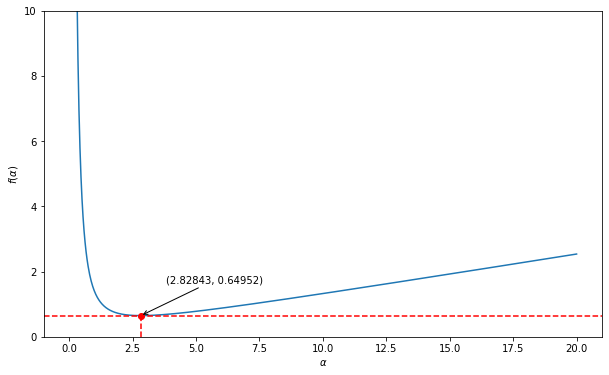

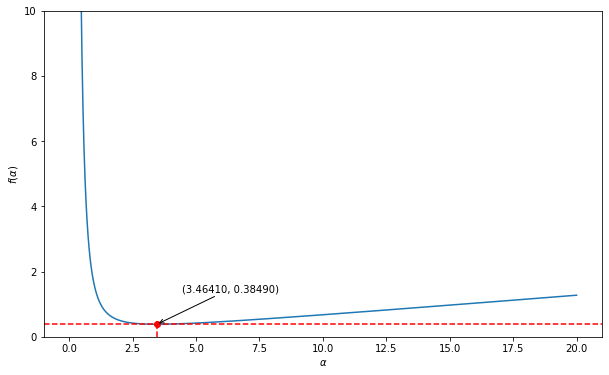

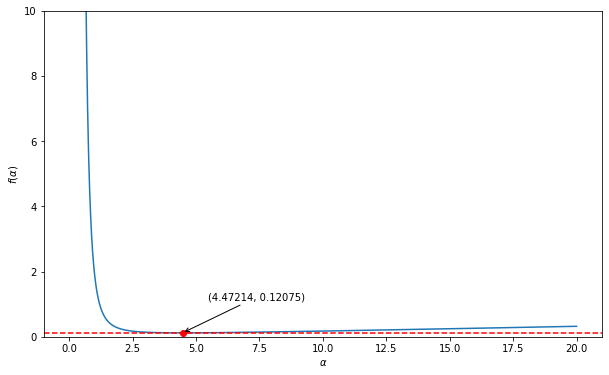

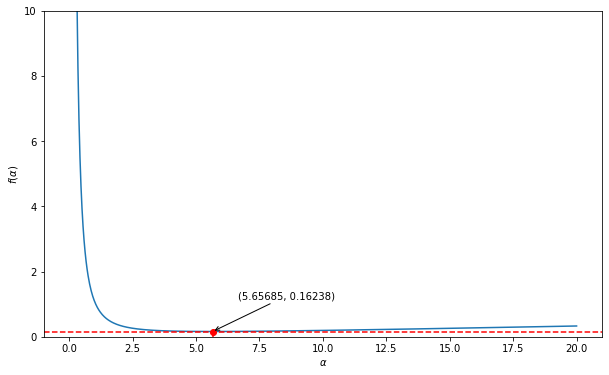

In [13]:
function_plot(N=2, x0=0.5)
function_plot(N=3, x0=0.5)
function_plot(N=5, x0=0.5)
function_plot(N=2, x0=0.25)

From our plot, we can see that the result works well for the first system. Then we need to verify this result and plot to see whether is ture for our example in Julia code.